In [1]:
fd#dataset Splitting

import splitfolders
input_folder="D:\\deeplearning\\scratches\\data\\note_dataset"
output_folder = 'scratches/data/note_dataset_splitted'
splitfolders.ratio(input_folder,output="dataset",seed=42,ratio=(.7,.2,.1),group_prefix=None)

Copying files: 71542 files [10:34, 112.73 files/s]


In [19]:
input_folder="../data/note_dataset/example/"
output_folder = 'C:/Users/mohib/OneDrive/Desktop/a'
splitfolders.ratio(input_folder,output=output_folder,seed=42,ratio=(.7,.2,.1),group_prefix=None)

Copying files: 6105 files [00:13, 462.89 files/s]


In [1]:
dataset_path = 'D:\\deeplearning\\scratches\\data\\note_dataset_splitted'

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
from torchvision import models

In [3]:
import os
print(os.listdir(dataset_path))
classes = os.listdir(dataset_path + "/train")
print(classes)
print(len(classes))

['test', 'train', 'val']
['10', '100', '1000', '2', '20', '200', '5', '50', '500']
9


In [4]:
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
from torchvision.datasets import ImageFolder
train_ds = ImageFolder(dataset_path+'/train',transform=train_transforms)
valid_ds= ImageFolder(dataset_path+'/val',transform=val_transforms)

In [6]:
train_loader = DataLoader(train_ds, batch_size=100, shuffle=True)
val_loader = DataLoader(valid_ds, batch_size=100, shuffle=False)

In [7]:
model = models.resnet50(pretrained=True)

C:\Users\mohib\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\mohib\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 9)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
device

device(type='cuda', index=0)

In [11]:
val_accs=[]
val_losses=[]
train_losses=[]

In [12]:
from tqdm import tqdm
import time
num_epoch=4
for epoch in range(num_epoch):
    model.train()
    running_loss = 0.0

    t_start = time.time()

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1} - Training", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_ds)
    train_losses.append(epoch_loss) # for storing history

    # Validate model
    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1} - Validation", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            val_correct += torch.sum(preds == labels.data)

    val_loss = val_loss / len(valid_ds)
    val_acc = val_correct.double() / len(valid_ds)

    #for storing history
    val_accs.append(val_acc)
    val_losses.append(val_loss)

    t_end = time.time()
    epoch_time = t_end - t_start

    print(f"Epoch {epoch+1} | Train Loss: {epoch_loss:.3f} | Val Loss: {val_loss:.3f} | Val Acc: {val_acc:.3f} | Time: {epoch_time:.2f}s")

Epoch 1 | Train Loss: 0.197 | Val Loss: 0.035 | Val Acc: 0.997 | Time: 498.15s


Epoch 2 | Train Loss: 0.030 | Val Loss: 0.017 | Val Acc: 0.998 | Time: 344.70s


Epoch 3 | Train Loss: 0.018 | Val Loss: 0.009 | Val Acc: 1.000 | Time: 335.04s


Epoch 4 | Train Loss: 0.013 | Val Loss: 0.007 | Val Acc: 0.999 | Time: 196.50s


In [13]:
test_transforms = transforms.Compose([

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = ImageFolder(dataset_path+'/test', transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [14]:
train_losses,val_losses,val_accs

([0.19689298992864024,
  0.030317615900845214,
  0.018246205209759524,
  0.012566885944638128],
 [0.03450327134516698,
  0.016576450046998075,
  0.008512321978719395,
  0.006821376755141482],
 [tensor(0.9969, device='cuda:0', dtype=torch.float64),
  tensor(0.9985, device='cuda:0', dtype=torch.float64),
  tensor(0.9997, device='cuda:0', dtype=torch.float64),
  tensor(0.9994, device='cuda:0', dtype=torch.float64)])

In [15]:

correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {(correct/total)*100}%")

Accuracy on test set: 89.10918737782742%


In [17]:
val_accs = [0.997,0.998,1,0.999]


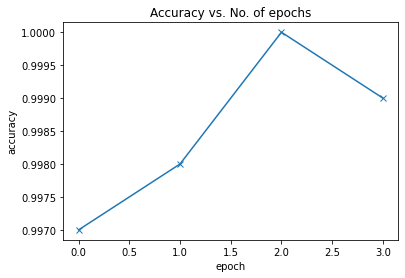

In [18]:
import matplotlib.pyplot as plt
def plot_accuracies(accuracy):

    plt.plot(accuracy, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
plot_accuracies(val_accs)

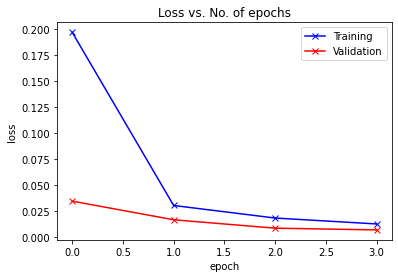

In [19]:
def plot_losses(trainloss,valloss):


    plt.plot(trainloss, '-bx')
    plt.plot(valloss, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])

    plt.title('Loss vs. No. of epochs')
plot_losses(train_losses,val_losses)